# MLPR LAB 1

### PROSHITA AGARWAL

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

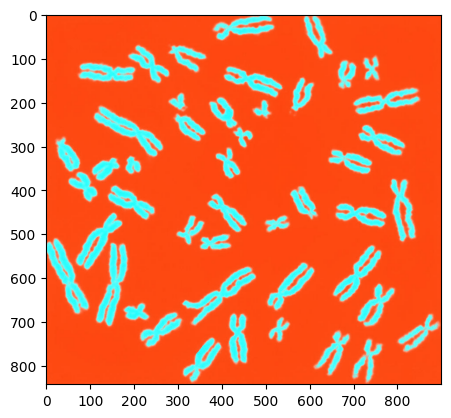

In [46]:
img1 = cv2.imread("chromosomes.jpg")
plt.imshow(img1)

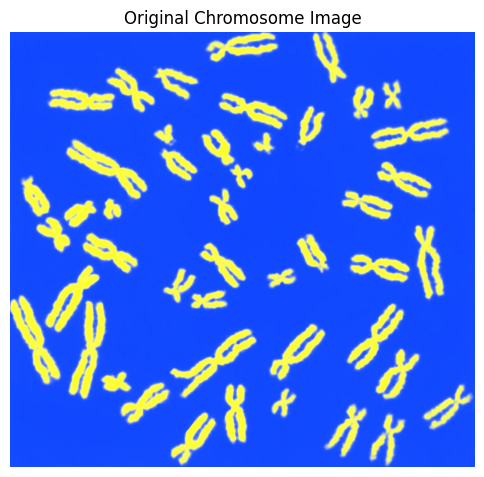

In [43]:
#converting the image from BGR to RGB as Conversion from BGR to RGB is needed because OpenCV loads images in BGR format while Matplotlib expects RGB, and without this conversion the image colors are displayed incorrectly
img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))   #setting figure size for better visibility
plt.imshow(img)
plt.title("Original Chromosome Image") 
plt.axis("off")
plt.show()

In [33]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray", gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
#his code creates a grayscale image on a different window instead of displaying the result inline
#hence in the next line of code i used plt to display the image converted to grayscale

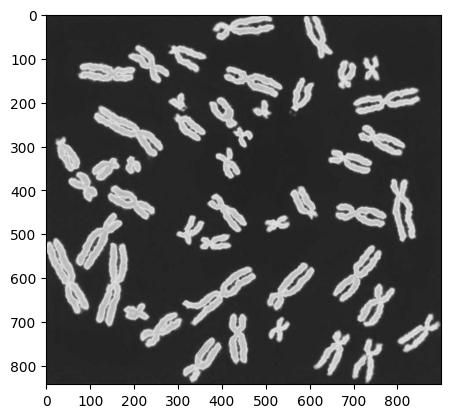

In [34]:
plt.imshow(gray_image, cmap='gray')
plt.axis('on')
plt.show()

In [35]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
#sets a 5 by 5 rectangular kernel to scan the entire image to define how the image will be cleaned

opened = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)
#removes all small noise to smooth the background

In [36]:
_, binary =  cv2.threshold(opened, 127, 255, cv2.THRESH_BINARY)
#THRESH_BINARY describes the tupe of threshold being set, here, binary
#throwaway variable used here as cv2.threshold returns two values, but we are only concerened with the binary image now

contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cv2.RETR_EXTERNAL is the retrieval mode which finds only the outermost contours
#cv2.CHAIN_APPROX_SIMPLE stores only essential boundary points

In [ ]:
threshold = 5
features = []   # list to store features

if len(contours) >= threshold:
    for contour in contours:
        #bounding box
        x, y, w, h = cv2.boundingRect(contour)

        #area and perimeter
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)

        #circularity
        if perimeter == 0:
            circularity = 0
        else:
            circularity = (4 * np.pi * area) / (perimeter ** 2)

        #store features
        features.append({
            "Height": h,
            "Width": w,
            "Area": area,
            "Perimeter": perimeter,
            "Circularity": circularity
        })

df = pd.DataFrame(features, columns=["Height", "Width", "Area", "Perimeter", "Circularity"])
df

,Height,Width,Area,Perimeter,Circularity
0,106,73,3600.5,412.835567,0.265472
1,108,93,4392.5,331.806129,0.501364
2,107,85,3985.0,389.705623,0.329735
3,60,52,1652.0,202.509666,0.506207
4,91,101,3832.5,342.149275,0.411397
5,120,49,4518.5,343.521858,0.481167
6,85,99,4098.5,313.865005,0.522816
7,45,63,1874.5,199.438599,0.592212
8,102,89,4495.5,344.007140,0.477368
9,138,170,7166.0,559.528998,0.287635


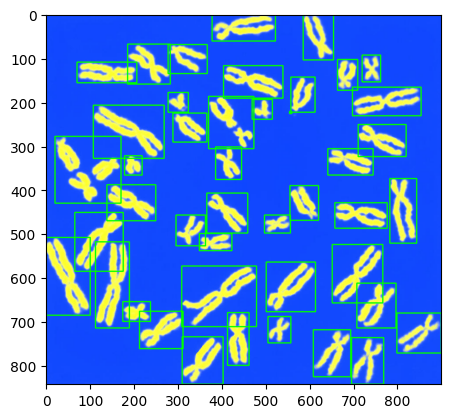

In [44]:
if len(contours) >= 5:
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(
            img,
            (x, y),
            (x + w, y + h),
            (0, 255, 0),  #green box
            2
        )
plt.imshow(img)

In [39]:
#extract feature arrays from the features list
heights = np.array([f["Height"] for f in features])
widths = np.array([f["Width"] for f in features])
areas = np.array([f["Area"] for f in features])
perimeters = np.array([f["Perimeter"] for f in features])
circularities = np.array([f["Circularity"] for f in features])

#standardization
def standardize(arr):
    return (arr - np.mean(arr)) / np.std(arr)

std_heights = standardize(heights)
std_widths = standardize(widths)
std_areas = standardize(areas)
std_perimeters = standardize(perimeters)
std_circularities = standardize(circularities)

#normalization
def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

norm_heights = normalize(heights)
norm_widths = normalize(widths)
norm_areas = normalize(areas)
norm_perimeters = normalize(perimeters)
norm_circularities = normalize(circularities)

In [45]:
#printing all results
print("STANDARDIZED FEATURES")
print("Height:", std_heights)
print("Width:", std_widths)
print("Area:", std_areas)
print("Perimeter:", std_perimeters)
print("Circularity:", std_circularities)

print("\nNORMALIZED FEATURES")
print("Height:", norm_heights)
print("Width:", norm_widths)
print("Area:", norm_areas)
print("Perimeter:", norm_perimeters)
print("Circularity:", norm_circularities)

STANDARDIZED FEATURES
Height: [ 0.47955779  0.53095985  0.50525882 -0.70268943  0.09404239  0.83937217
 -0.06016377 -1.08820483  0.37675369  1.30199065  0.65946498  1.17348551
  2.79265019  2.30433069 -1.24241099 -1.19100894 -0.44567917  1.19918654
 -0.75409149  0.09404239 -0.21436993 -0.13726685  1.53329989 -1.11390586
 -0.70268943 -0.34287506  1.66180502 -0.36857609 -0.54848327 -2.1162459
  0.86507319 -1.08820483  0.81367114 -1.08820483 -0.5741843  -0.1886689
 -0.34287506 -1.03680278 -0.44567917 -0.67698841 -0.54848327  0.09404239
  0.40245471 -0.70268943]
Width: [-0.43221064  0.11662827 -0.1029073  -1.0084915   0.33616383 -1.09081734
  0.28127994 -0.7066301   0.00686049  2.22965808  0.63802523  0.72035107
 -0.32244286  0.30872189 -0.4047687  -0.81639788 -0.59686232  0.58314134
  0.83011885  0.11662827 -0.65174621  0.61058329 -0.76151399 -1.33779485
  0.39104772 -0.81639788  1.68081917  0.5556994  -0.32244286 -2.29826294
  1.98268057 -1.17314317  0.39104772 -1.17314317  1.84547084 -0

### REPORT

**Q1: How can contour detection be used to identify objects in an image?**

*Contour detection helps identify objects in an image by detecting the continuous boundaries of connected regions. After preprocessing steps like converting the image to grayscale, removing background noise using morphological operations, and applying thresholding, the objects in the image become clearly separated from the background. Contours are then detected as the outlines of these foreground regions. Each contour usually corresponds to a single object, such as a chromosome in this case. By detecting contours, we can locate objects, draw bounding boxes around them, and further analyze their properties like size and shape.*

**Q2: What is the importance of standardization of data? What difference did you observe before and after standardization?**

*Standardization is important because it brings all features to a common scale by transforming them to have zero mean and unit variance. In this experiment, features like area and perimeter had much larger numerical values compared to width or circularity. Before standardization, these large-scale features could dominate any analysis or comparison. After standardization, all features were centered around zero with similar spreads, making them equally important and easier to use for further analysis or machine learning tasks.*

**Q3: Let’s consider one of the values in the width column is missing. How to handle this missing value?**

*If a value in the width column is missing, it can be handled using data imputation. A simple and commonly used approach is to replace the missing value with the mean or median of the width values from the other chromosomes. This helps maintain the overall distribution of the data without removing the entire record. For small datasets, mean or median imputation is usually sufficient and easy to implement.*

**Q4: What is the importance of data normalization? What difference did you observe before and after normalization?**

*Data normalization is important because it rescales all features to a fixed range, usually between 0 and 1. This ensures that no feature dominates due to having larger numerical values. Before normalization, features like area and perimeter had very large ranges, while circularity values were already small. After normalization, all features were scaled to the same range, making them directly comparable and more suitable for distance-based analysis or visualization.*

**Q5: How might you adapt the bounding box construction process to handle overlapping or touching chromosomes?**

*To handle overlapping or touching chromosomes, additional image processing steps can be applied before contour detection. Techniques such as morphological erosion can help separate closely connected regions. More advanced methods like distance transform followed by watershed segmentation can also be used to split overlapping chromosomes into individual regions. By improving separation before contour detection, each chromosome can be enclosed within its own bounding box instead of grouping multiple chromosomes together.*